## Exploratory Data Analysis

### 1. Loading the data file and elementary EDA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_null = df.isnull()
df_null.head()
# As there is no missing values in df, each value represents False.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        False    False          False          False    False  False   
1        False    False          False          False    False  False   
2        False    False          False          False    False  False   
3        False    False          False          False    False  False   
4        False    False          False          False    False  False   

   DiabetesPedigreeFunction    Age  Outcome  
0                     False  False    False  
1                     False  False    False  
2                     False  False    False  
3                     False  False    False  
4                     False  False    False

In [6]:
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()
# We can see a summary of the numerical data by using describe().
# As there cannot be zero values in Glucose, skinthickness, and BMI, these columns might have missing values as zero.
# We can figure out the data better by using data visualization.

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### 2. Data Visualization for missing values

In [8]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
# Replace '0' with NaN considering it a missing value
# There are lots of missing values in glucose, bloodpressure, BMI, and especially insulin.
# Previously, insulin was not helpful to predict diabetes as there might have been lots of missing values.

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

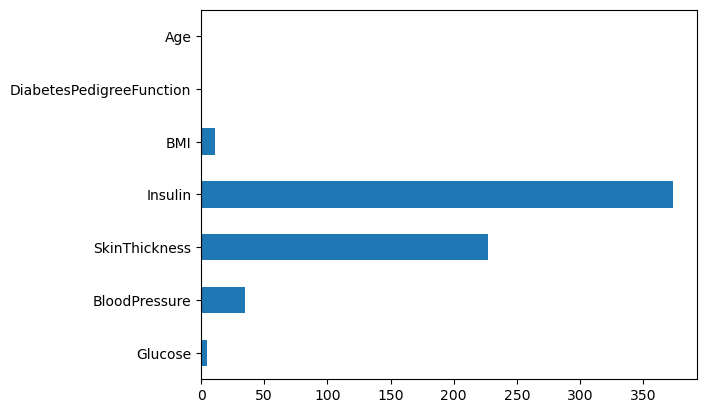

In [11]:
# We can see the number of missing values in a horizontal bar plot.
df_null.sum().plot.barh()

In [12]:
# About 48% of data in Insulin are missing values.
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

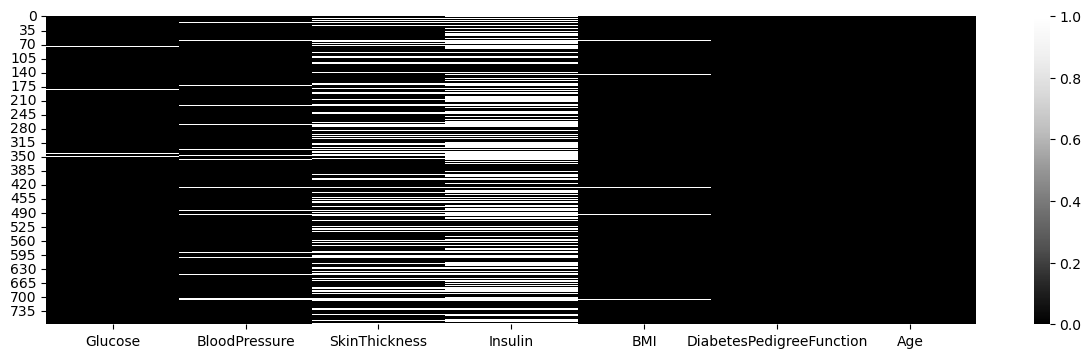

In [13]:
# Heatmap for the missing values
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

### 3. Label

In [14]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
df["Outcome"].value_counts()
# 1 means incidence and 0 means non-incidence. 
# We can see more non-incidence cases rather than incidence ones.

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
df["Outcome"].value_counts(normalize=True)
# The rate of incidence is about 34%.

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [17]:
df.groupby(["Pregnancies"])["Outcome"].mean()
# As women has more numbers of pregnancies, the probability of incidence of diabetes is high. 
# If the number of pregnancies is not less than 14, the likelihood of incidence is 100%.
# However, we can infer that this result is biased due to the limited data.

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [18]:
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])
# We also see the number of data in each frequency of pregnancy.

mean  count
Pregnancies                 
0            0.342342    111
1            0.214815    135
2            0.184466    103
3            0.360000     75
4            0.338235     68
5            0.368421     57
6            0.320000     50
7            0.555556     45
8            0.578947     38
9            0.642857     28
10           0.416667     24
11           0.636364     11
12           0.444444      9
13           0.500000     10
14           1.000000      2
15           1.000000      1
17           1.000000      1

In [19]:
# If you want to use Pregnancies as an index column, you can use reset_index()
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

### 4. Data Visualization

#### 4.1. Lineplot

<Axes: >

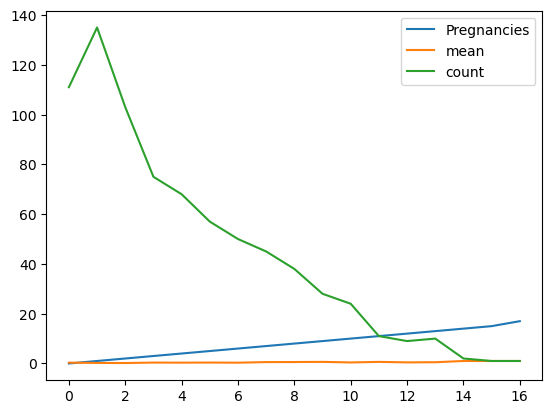

In [20]:
# Data visualization for the number of incedence according to the number of pregnancies
df_po.plot()

<Axes: >

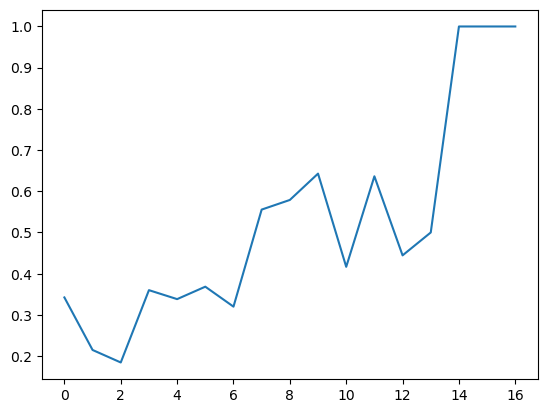

In [21]:
# Let's show only mean values
df_po["mean"].plot()

#### 4.2. Bar plot

<Axes: >

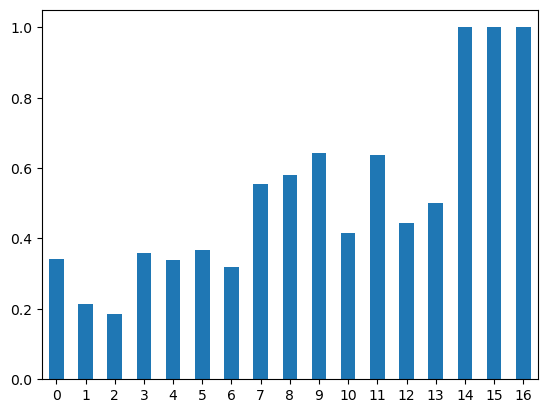

In [26]:
# We can also see the result in bar plot.
df_po["mean"].plot(kind='bar',rot=0)

#### 4.3. Count plot

<Axes: xlabel='Outcome', ylabel='count'>

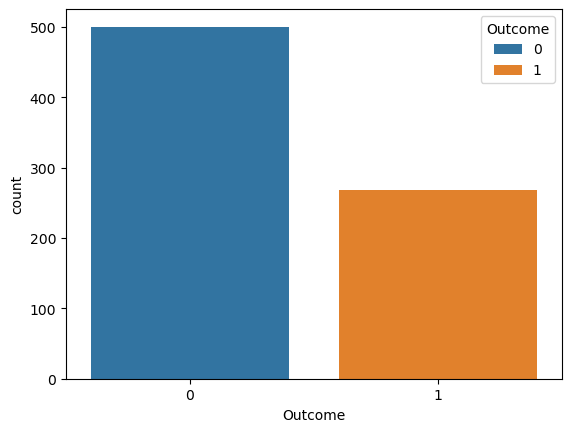

In [28]:
# Let's count the number of each category in Outcom
sns.countplot(data=df, x="Outcome", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

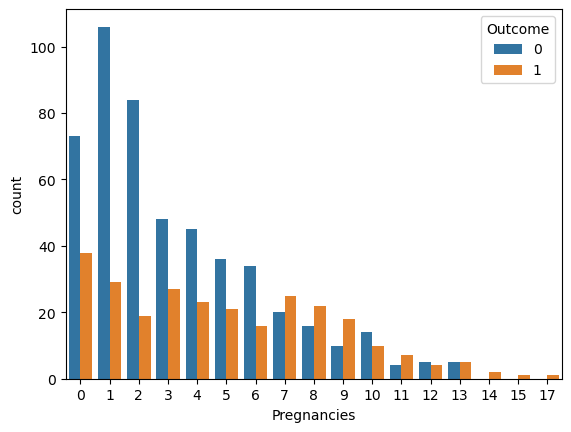

In [33]:
# Let's visualize the frequency of pregrancies in seperated outcomes
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [34]:
# We can split the frequency of pregnancies into a low and high group based on 6.
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

<Axes: xlabel='Pregnancies_high', ylabel='count'>

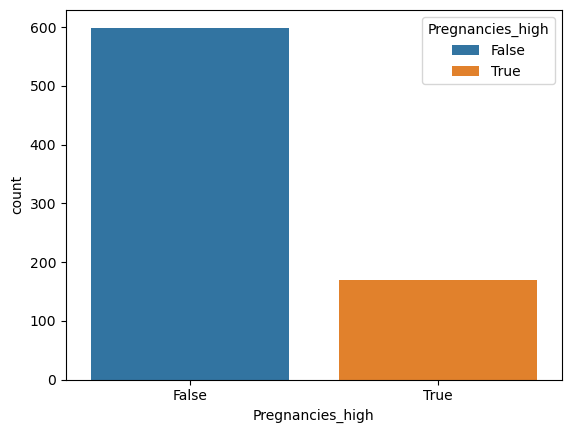

In [38]:
# Let's split the data into a low and high frequency of pregnancy.
sns.countplot(data=df, x="Pregnancies_high", hue="Pregnancies_high")

<Axes: xlabel='Pregnancies_high', ylabel='count'>

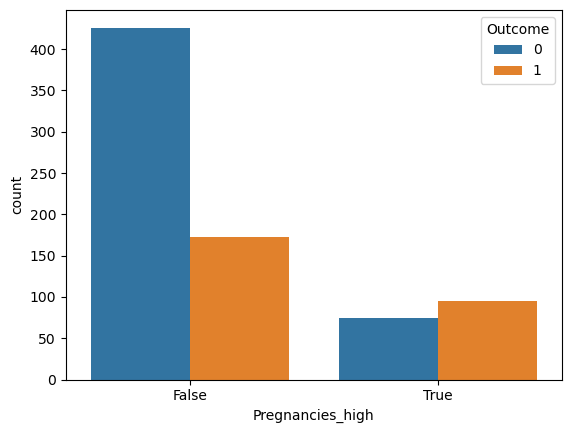

In [39]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")
# We can notice that when the number of pregnancies is above 6, the probability of incedenc of diabetes is more than 50%.

#### 4.4. Bar Plot

<Axes: xlabel='Outcome', ylabel='BMI'>

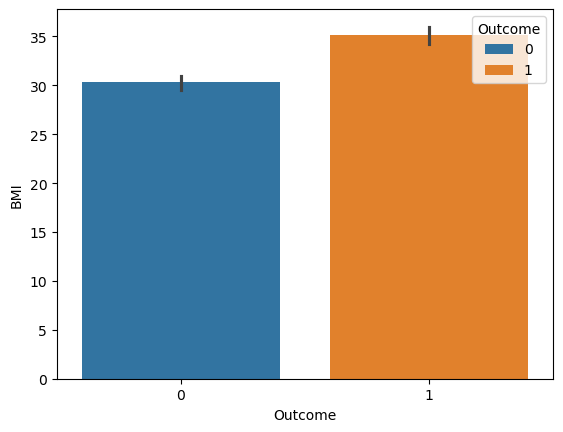

In [43]:
# Outcome and BMI
sns.barplot(data=df, x="Outcome", y="BMI", hue="Outcome")

<Axes: xlabel='Outcome', ylabel='Glucose'>

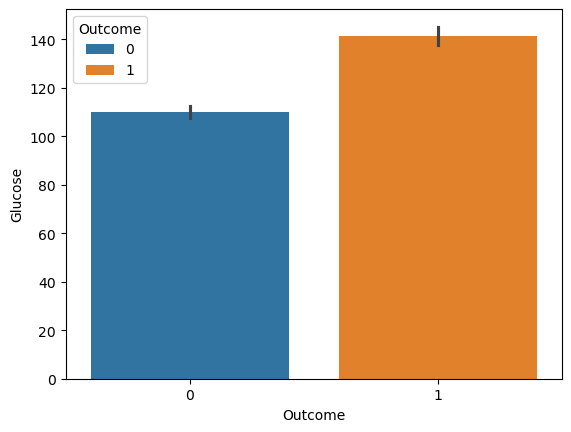

In [41]:
# Outcome and Glucose
sns.barplot(data=df, x="Outcome", y="Glucose", hue="Outcome")

<Axes: xlabel='Outcome', ylabel='Insulin'>

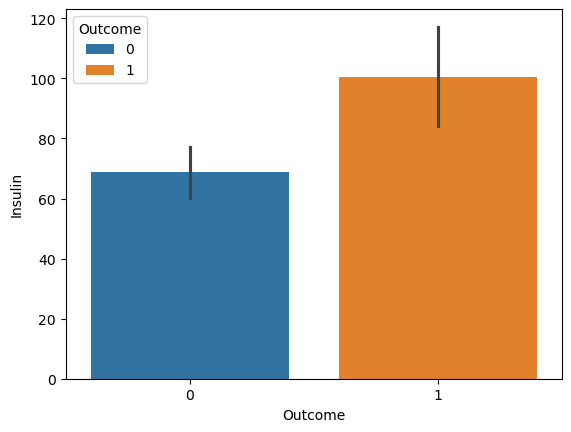

In [44]:
# Outcome and Insulin
sns.barplot(data=df, x="Outcome", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

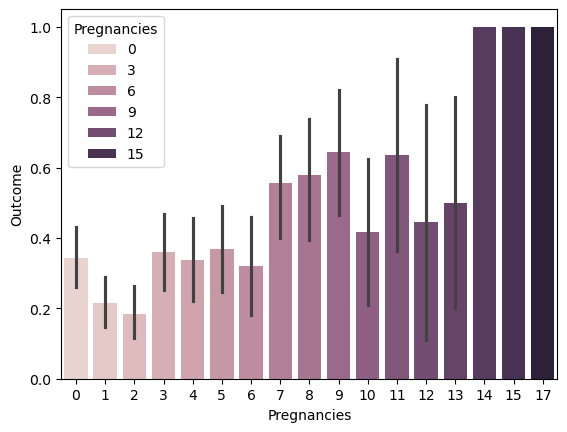

In [49]:
# Pregnancies and Outcome: We can see the upward trend.
sns.barplot(data=df, x="Pregnancies", y="Outcome", hue="Pregnancies")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

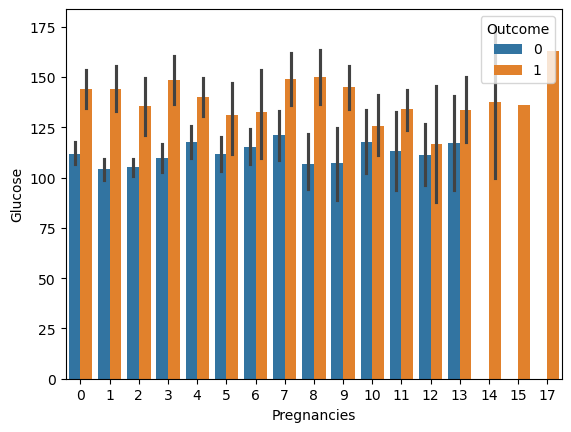

In [51]:
# The level of Glucose can vary based on the outcome.
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='BMI'>

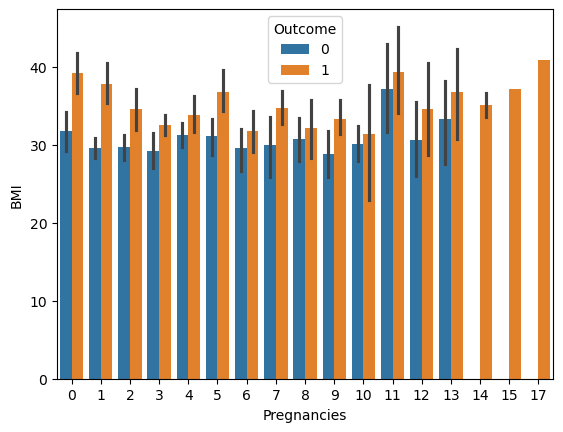

In [52]:
# The people who suffered from diabetes have a higher level of BMI.
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

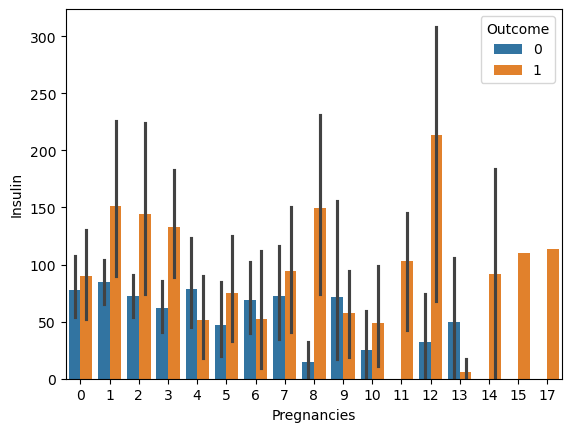

In [53]:
# The people who suffered from diabetes have a higher level of insulin.
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

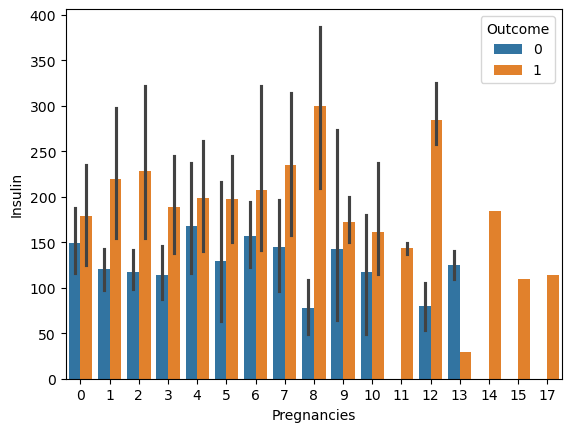

In [54]:
# From the above plot, we exclude the value of zero in insulin because this could represent a missing value
# One interesting thing is that confidence levels differ from each other among bars.
sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

#### 4.5. Boxplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

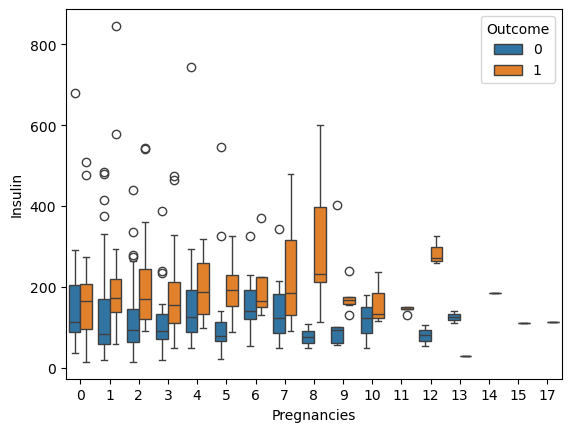

In [56]:
# We can see the above data in a different way by using boxplot.
sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

#### 4.6. Violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

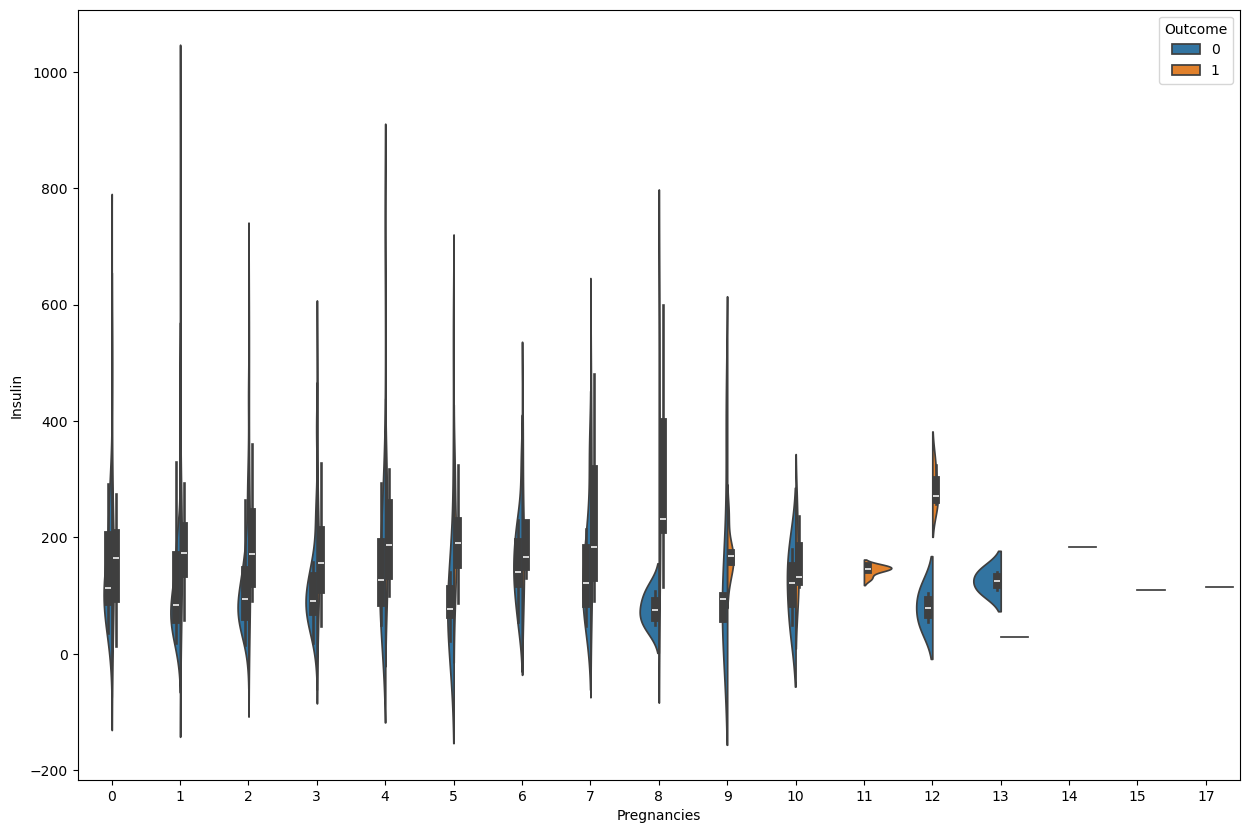

In [61]:
# Another different way to visualize the data is violinplot
plt.figure(figsize=(15, 10))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

#### 4.7 Swarmplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

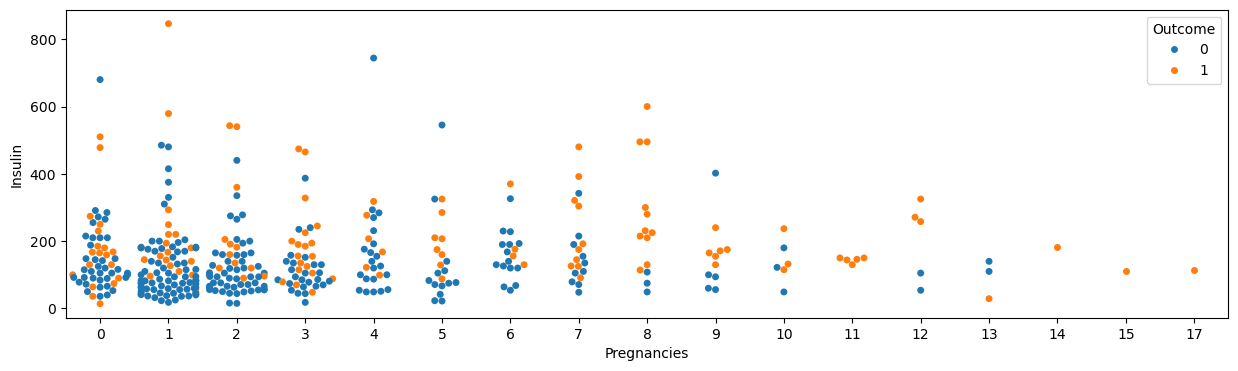

In [64]:
# There is another way like swarmplot
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

#### 4.8. Displot

<Axes: xlabel='Pregnancies', ylabel='Density'>

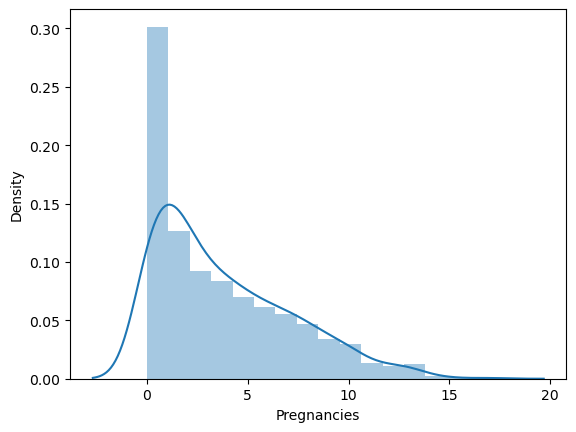

In [65]:
# Distribution of pregnancies
sns.distplot(df["Pregnancies"])

In [67]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

<Axes: xlabel='Pregnancies', ylabel='Density'>

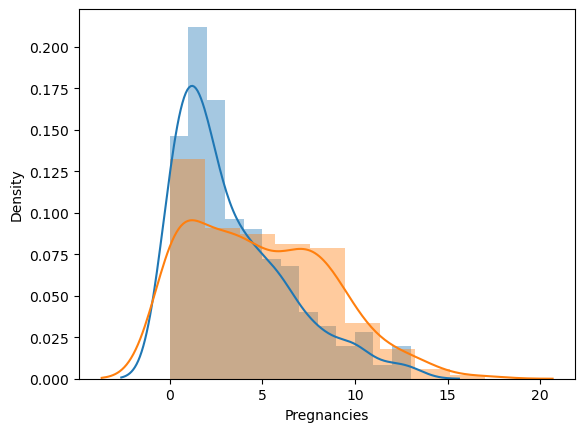

In [68]:
# When the number of pregnancies is above 5, the incedence rate increases.
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

<Axes: xlabel='Age', ylabel='Density'>

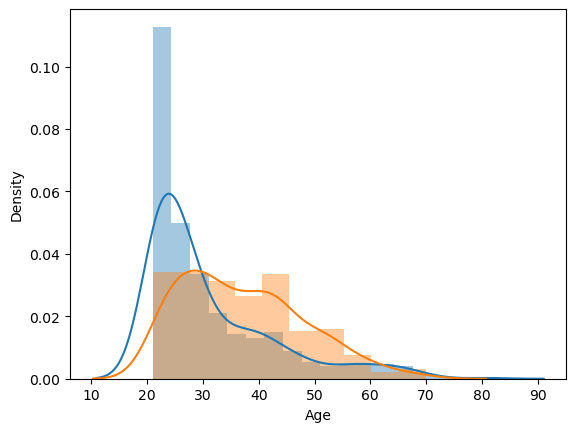

In [69]:
# When age is above 30, the incedence rate increases.
sns.distplot(df_0["Age"])
sns.distplot(df_1["Age"])

<Axes: xlabel='Age', ylabel='Density'>

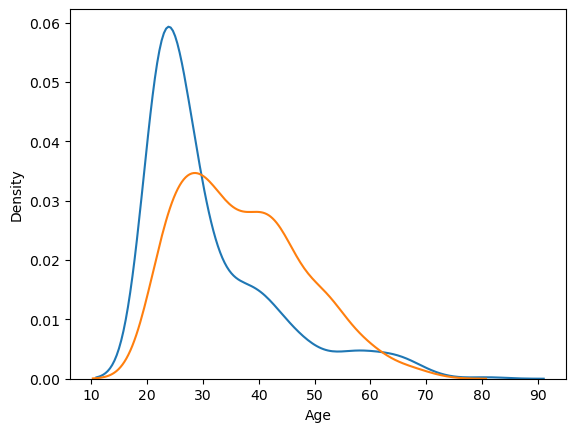

In [70]:
# We can select only curved lines excluding bins.
sns.distplot(df_0["Age"], hist=False)
sns.distplot(df_1["Age"], hist=False)

<Axes: xlabel='Age', ylabel='Density'>

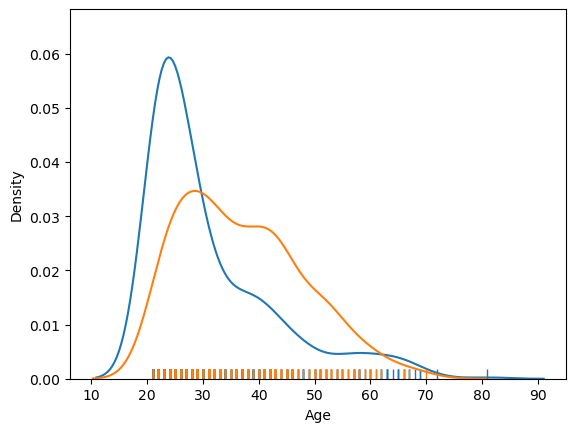

In [73]:
# We can also add rugs in the plot.
sns.distplot(df_0["Age"], hist=False, rug=True, label=0)
sns.distplot(df_1["Age"], hist=False, rug=True, label=1)

#### 4.9 subplot

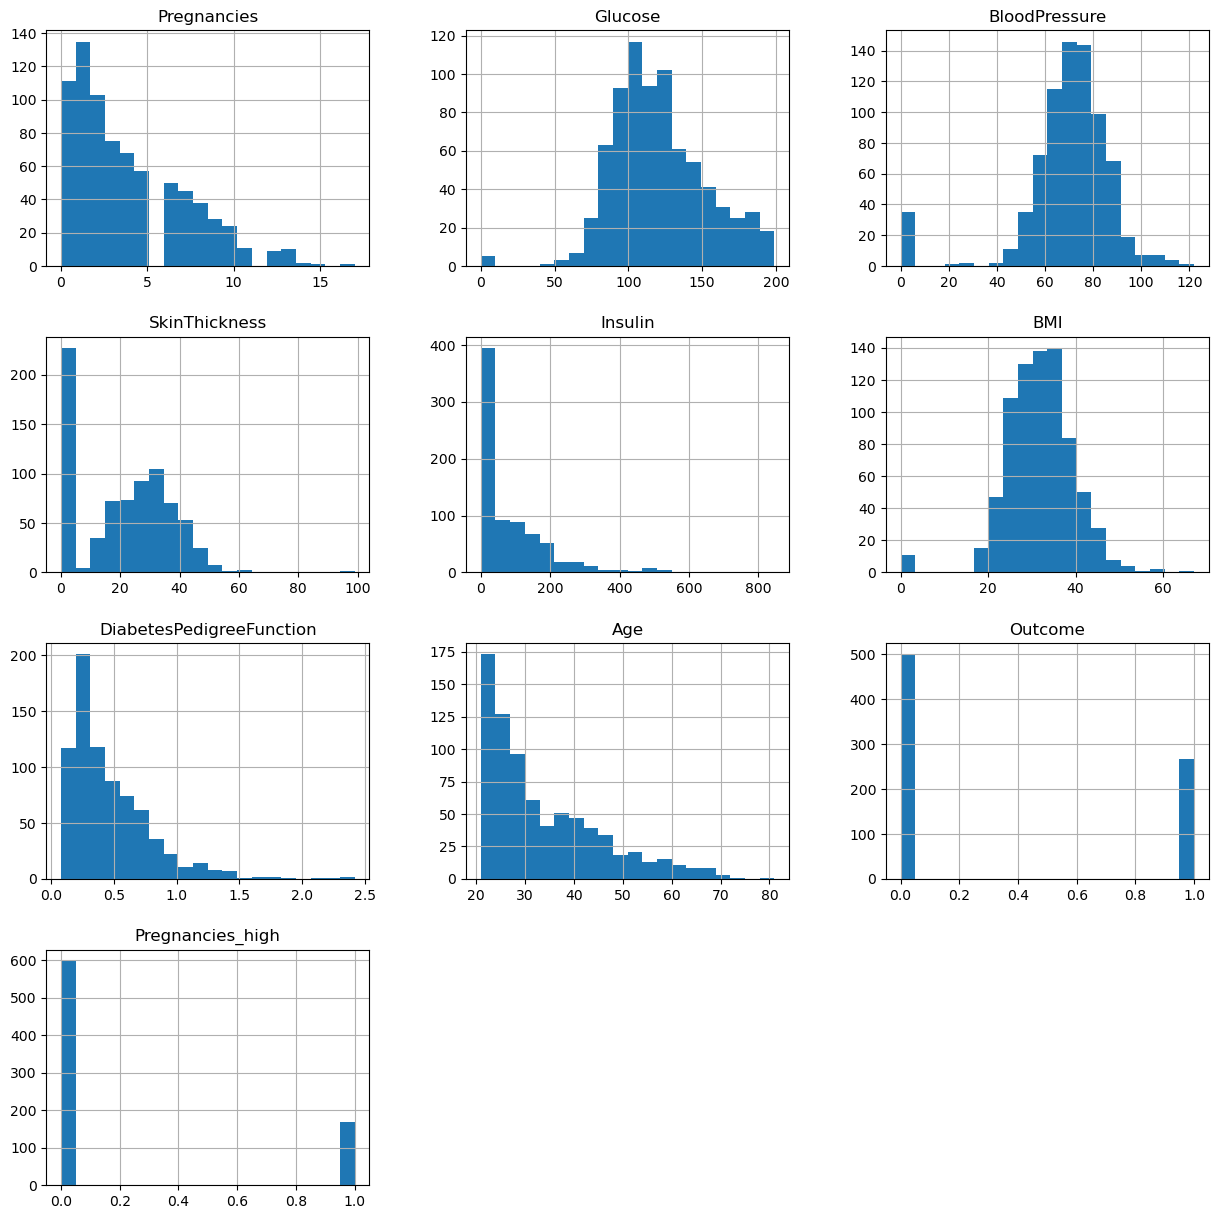

In [74]:
# Histogram: only numerical data can ve accepted for histogram.
# If we have boolean values, we need to change those into integer.
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=20)

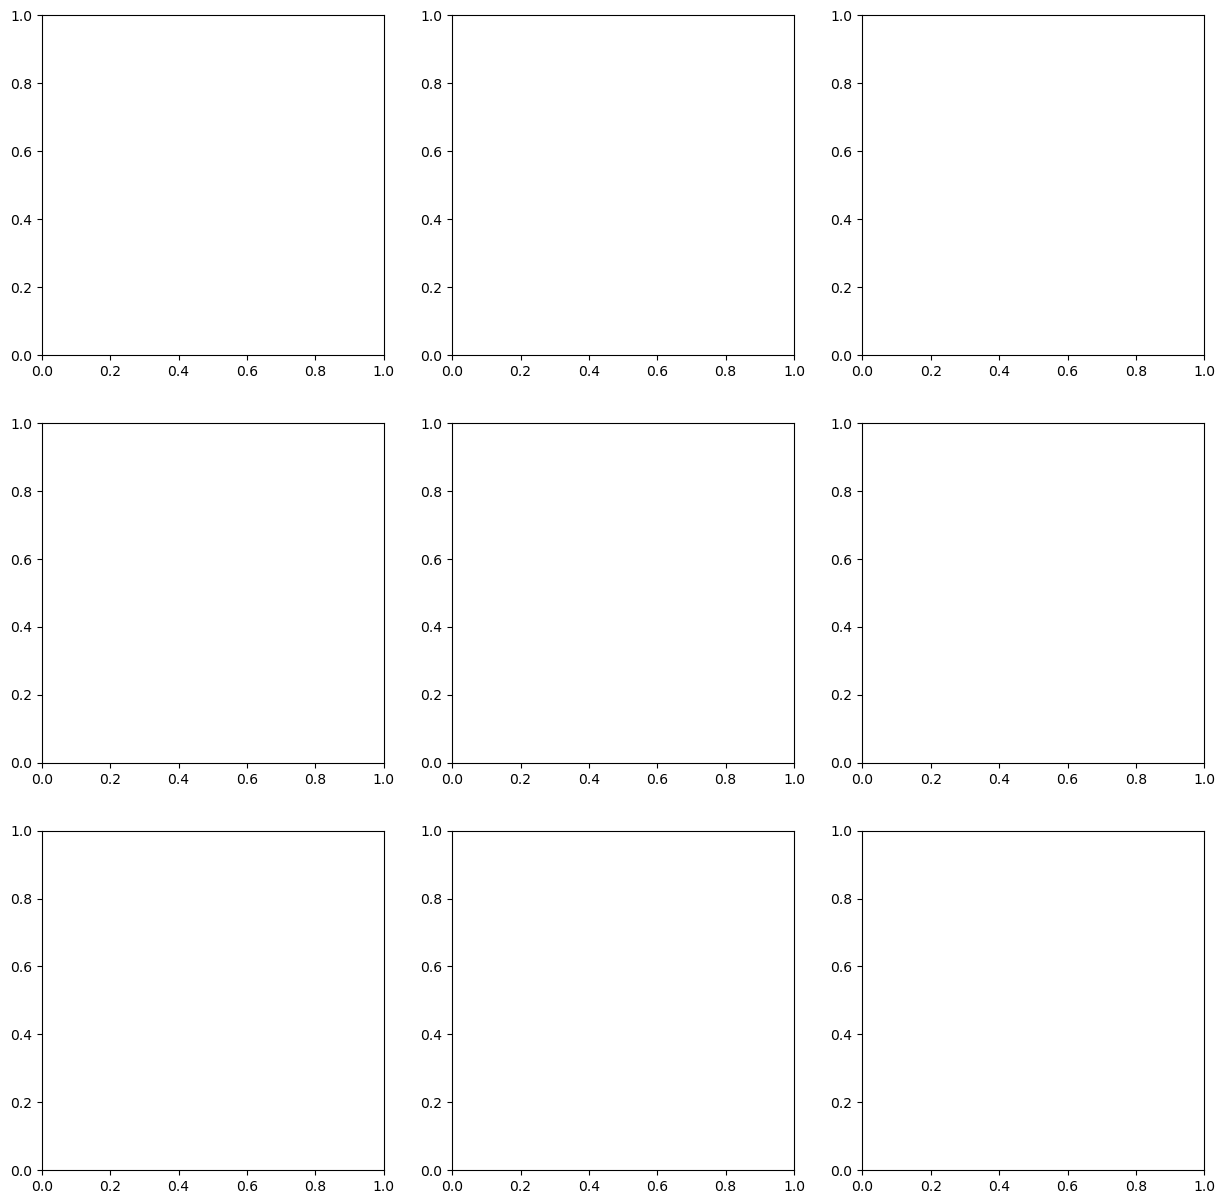

In [76]:
# Let's create subplots. 
# We have 10 columns now, so we can make 3x3 matrix subplot.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

<Axes: xlabel='Outcome', ylabel='Density'>

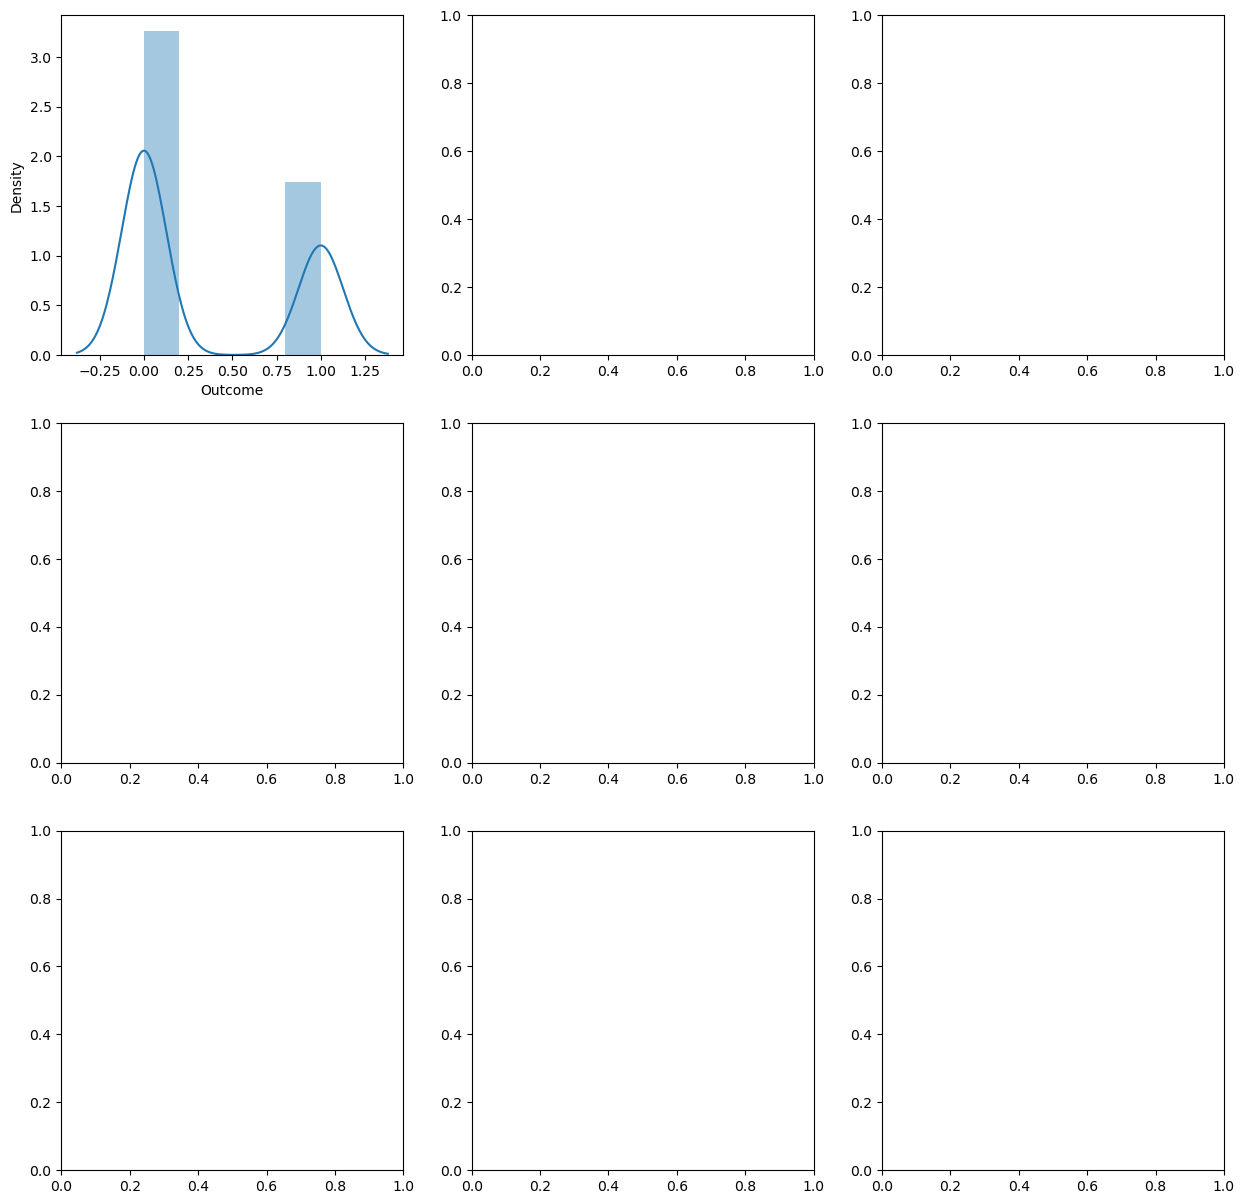

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
sns.distplot(df["Outcome"], ax=axes[0][0])

0
1
2
3
4
5
6
7
8


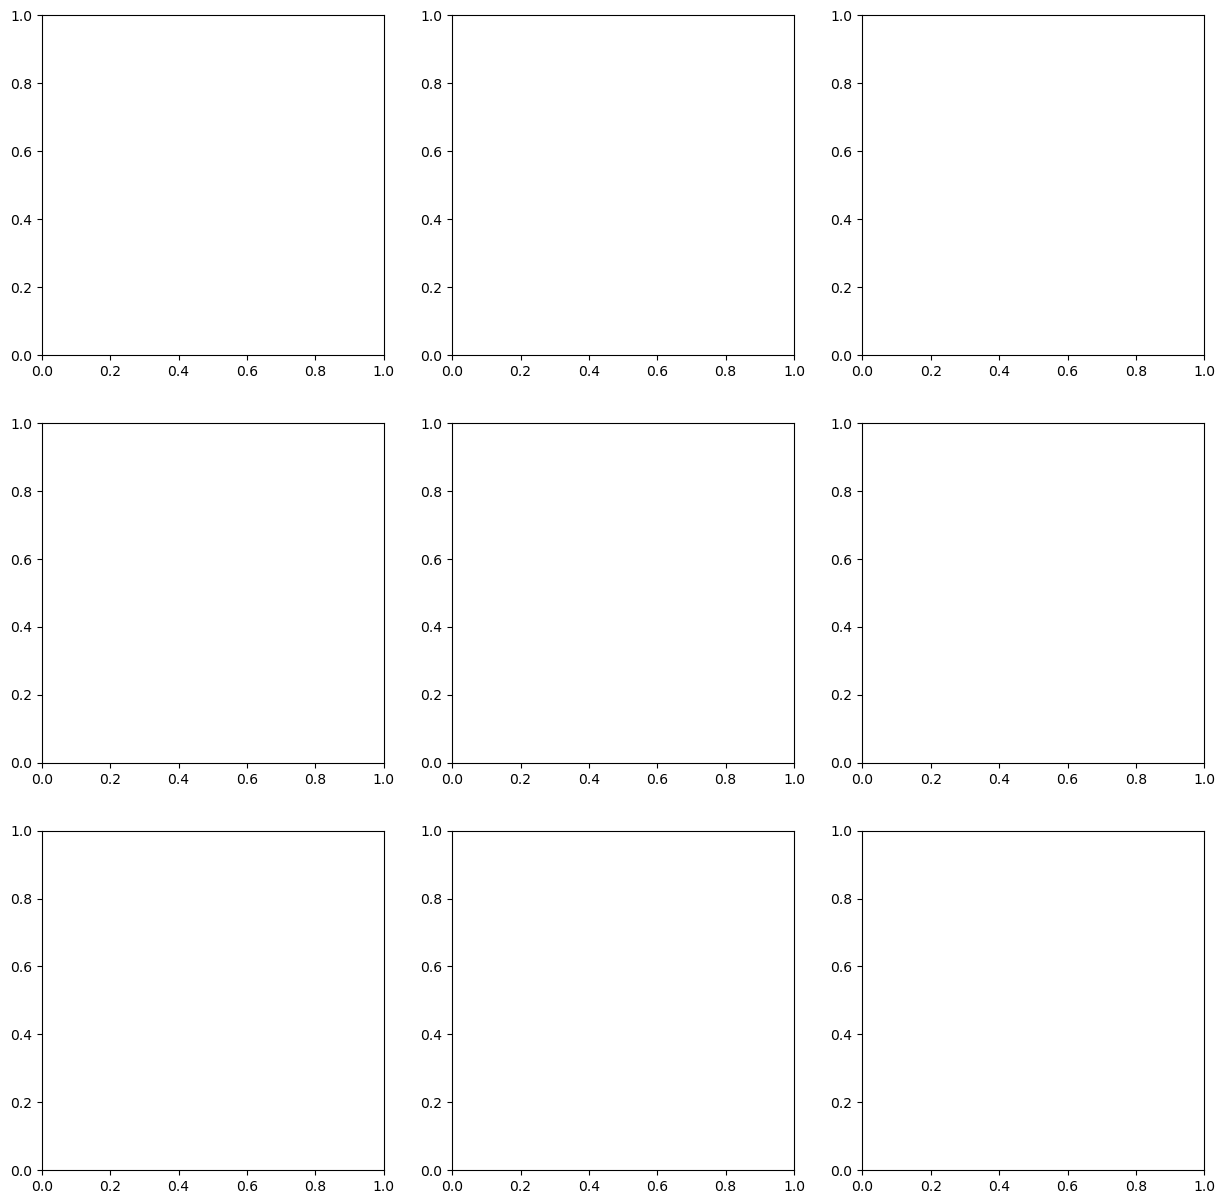

In [80]:
# We can also make subplot by using for loop.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(9):
    print(i)

In [87]:
# Let' visualize subplot by making for loop statement considering the cnumber of columns.
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

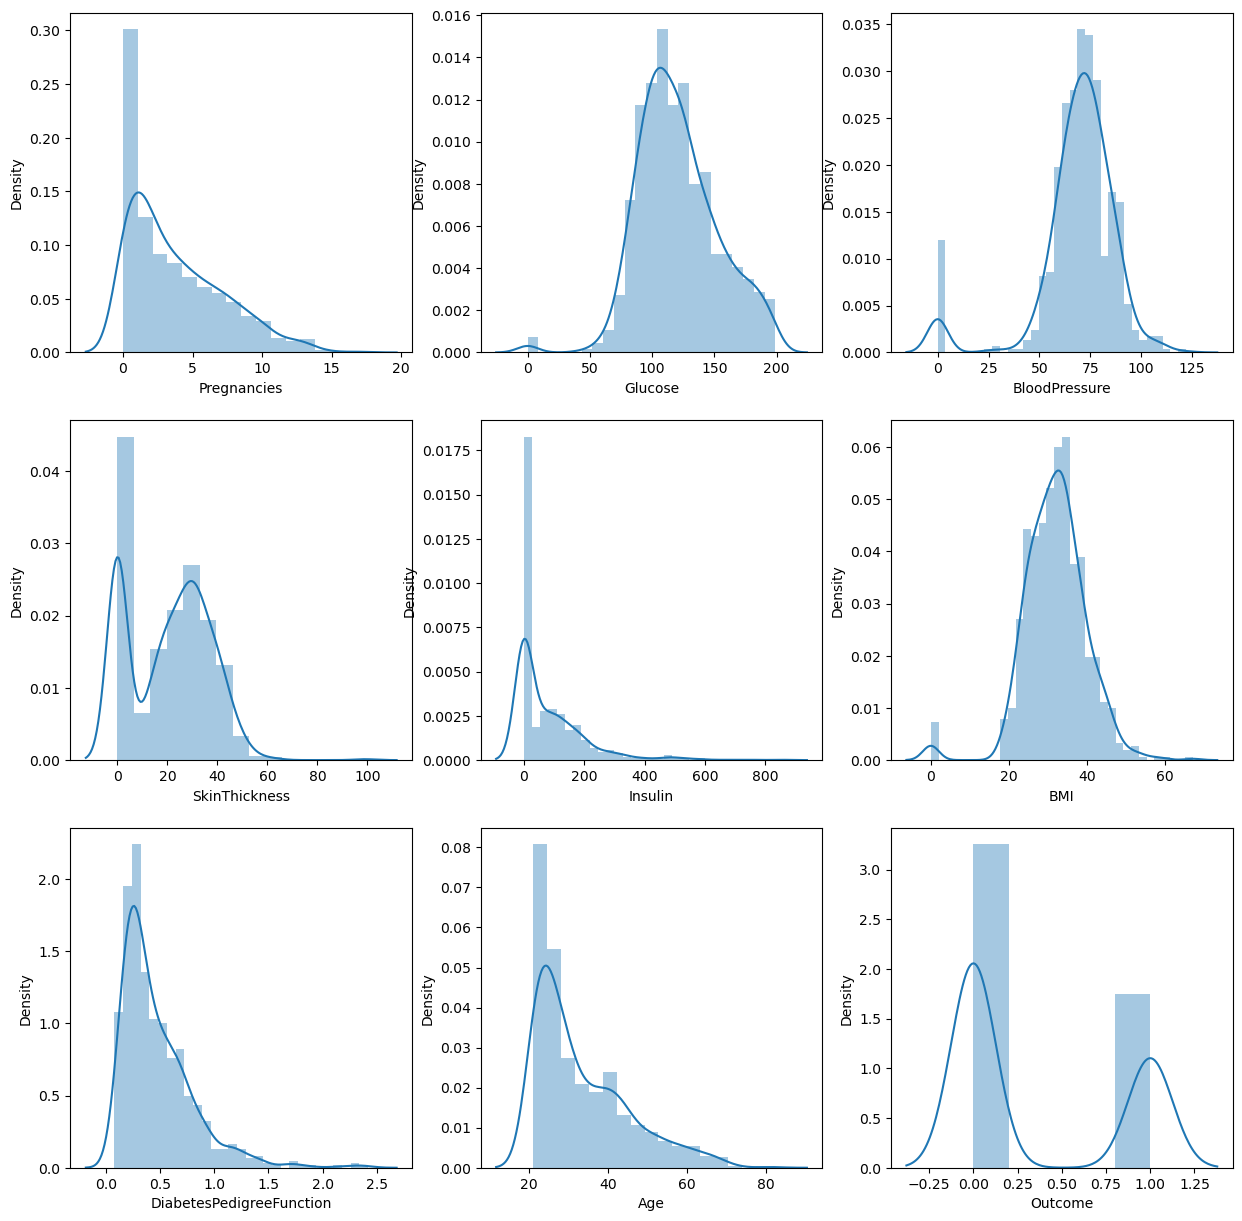

In [90]:
# We can visualize subplot by using displot.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3

    sns.distplot(df[col_name], ax=axes[row][col])

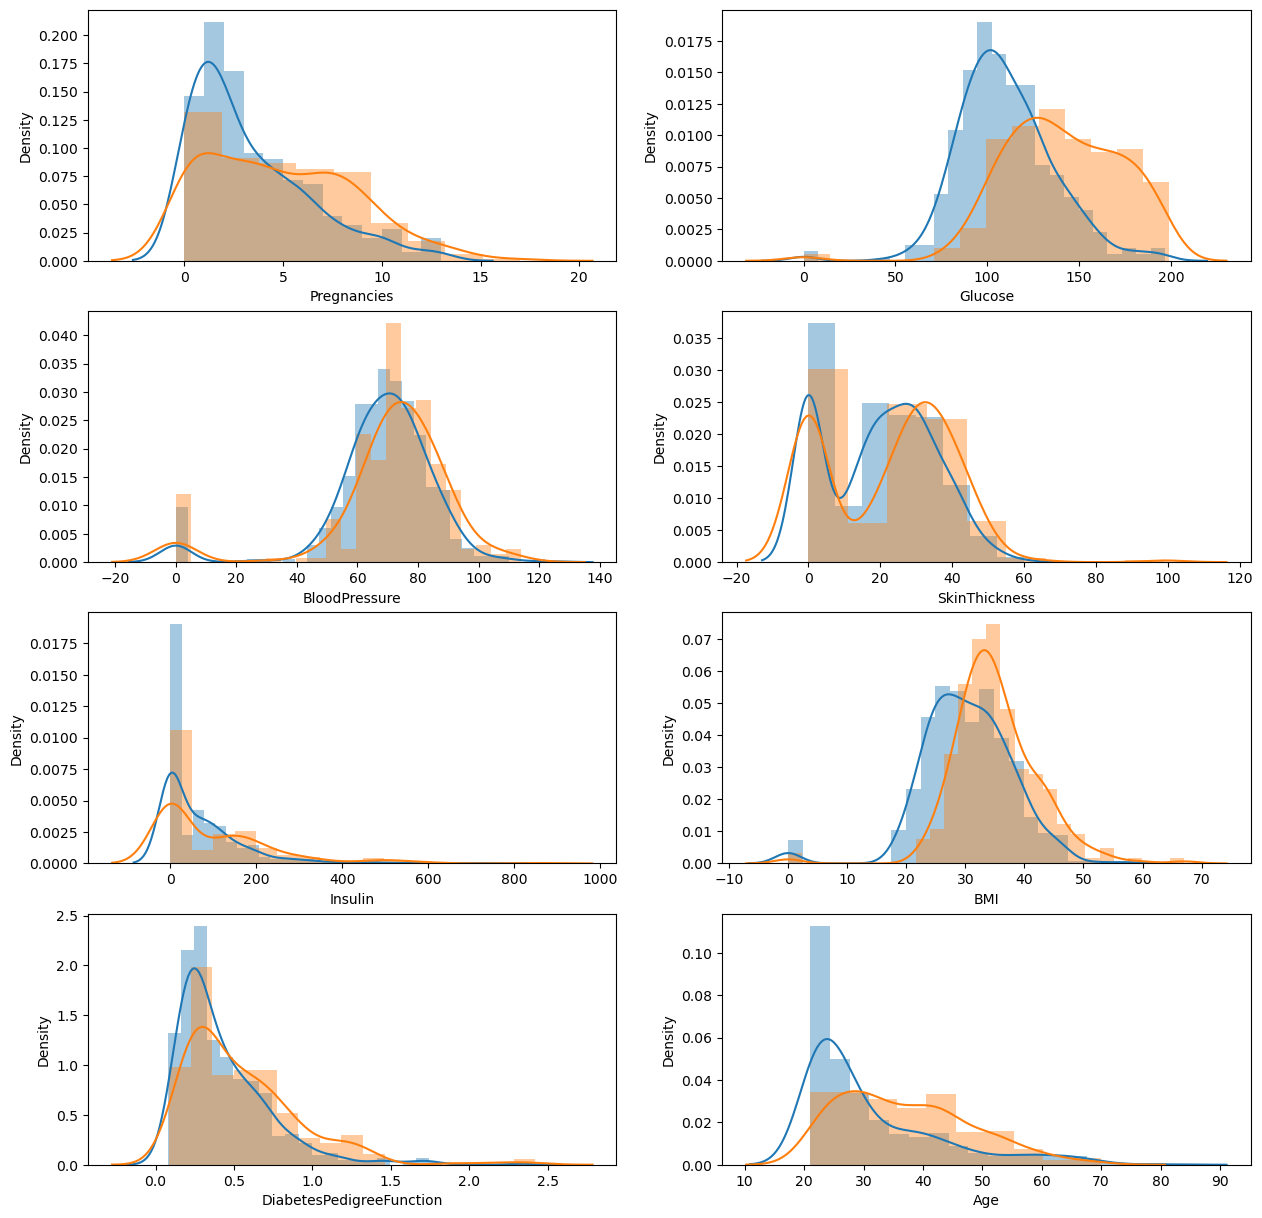

In [89]:
# We can make distplot for all the x variables. At this time, let's split the data into each category of outcome.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

#### 5. Understanding the difference between variables through data visualization

#### 5.1 violin plot

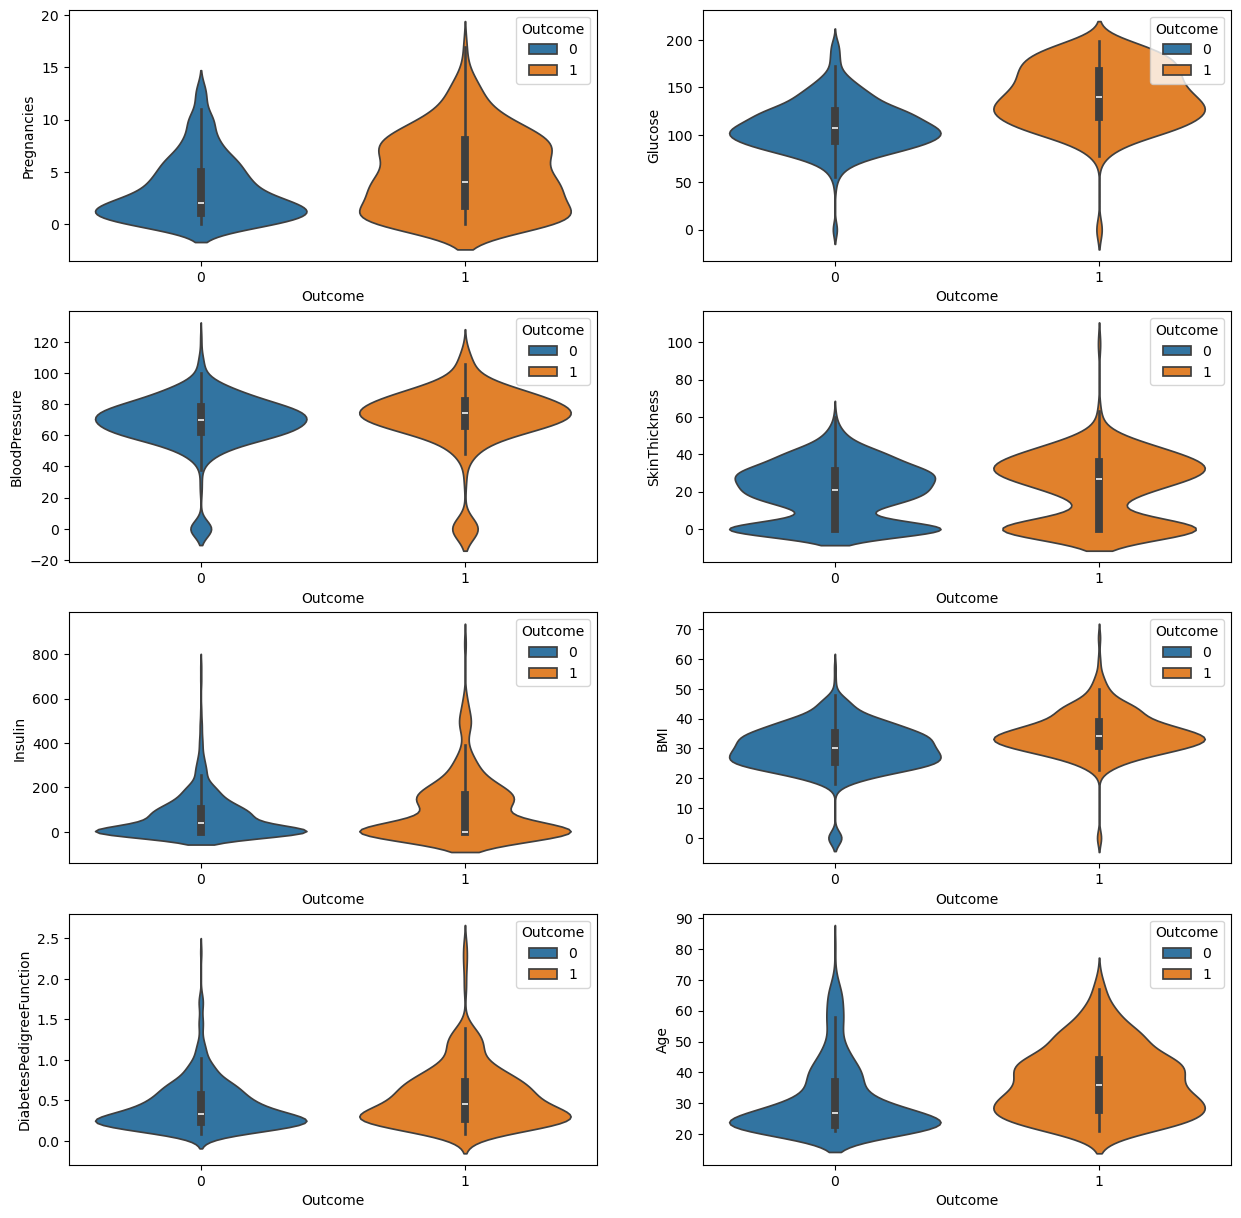

In [95]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], hue = "Outcome")

#### 5.2 regplot

<Axes: xlabel='Glucose', ylabel='Insulin'>

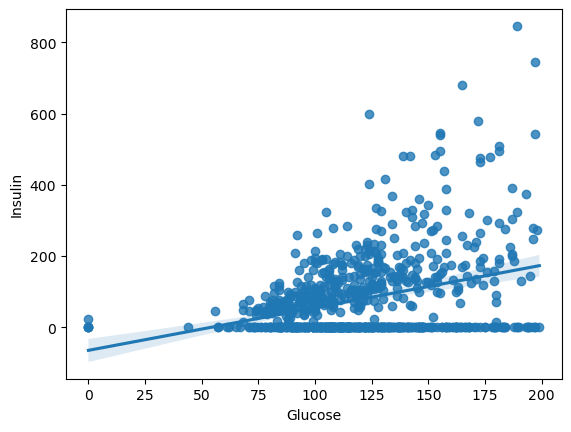

In [96]:
sns.regplot(data=df, x="Glucose", y="Insulin")

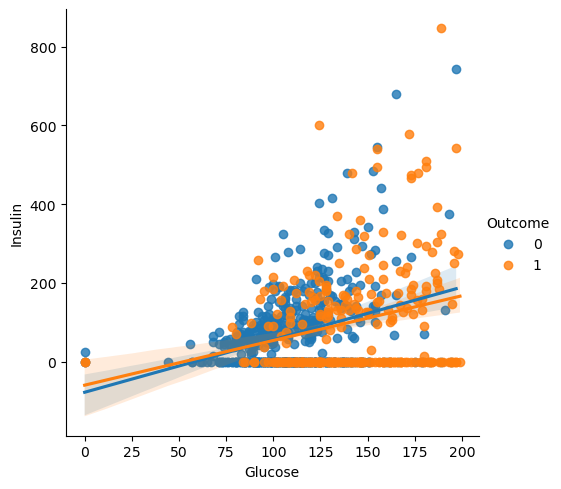

In [97]:
# There is not hue option in regplot so it can't select distinct colors for different categories of outcome.
# If we want to apply different colors to each category, we can use implot.
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

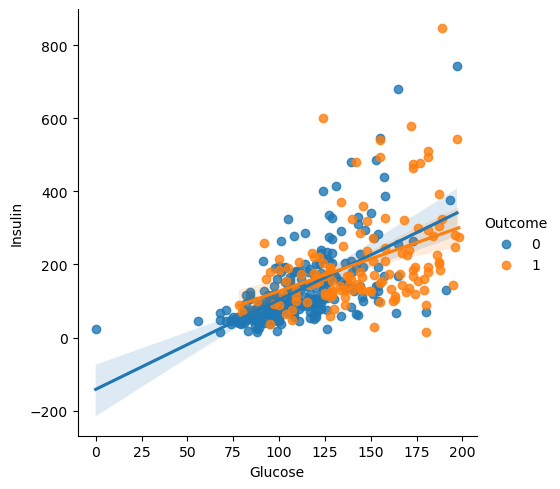

In [98]:
# Excluding zero value in insulin.
sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

#### 5.3. pairplot

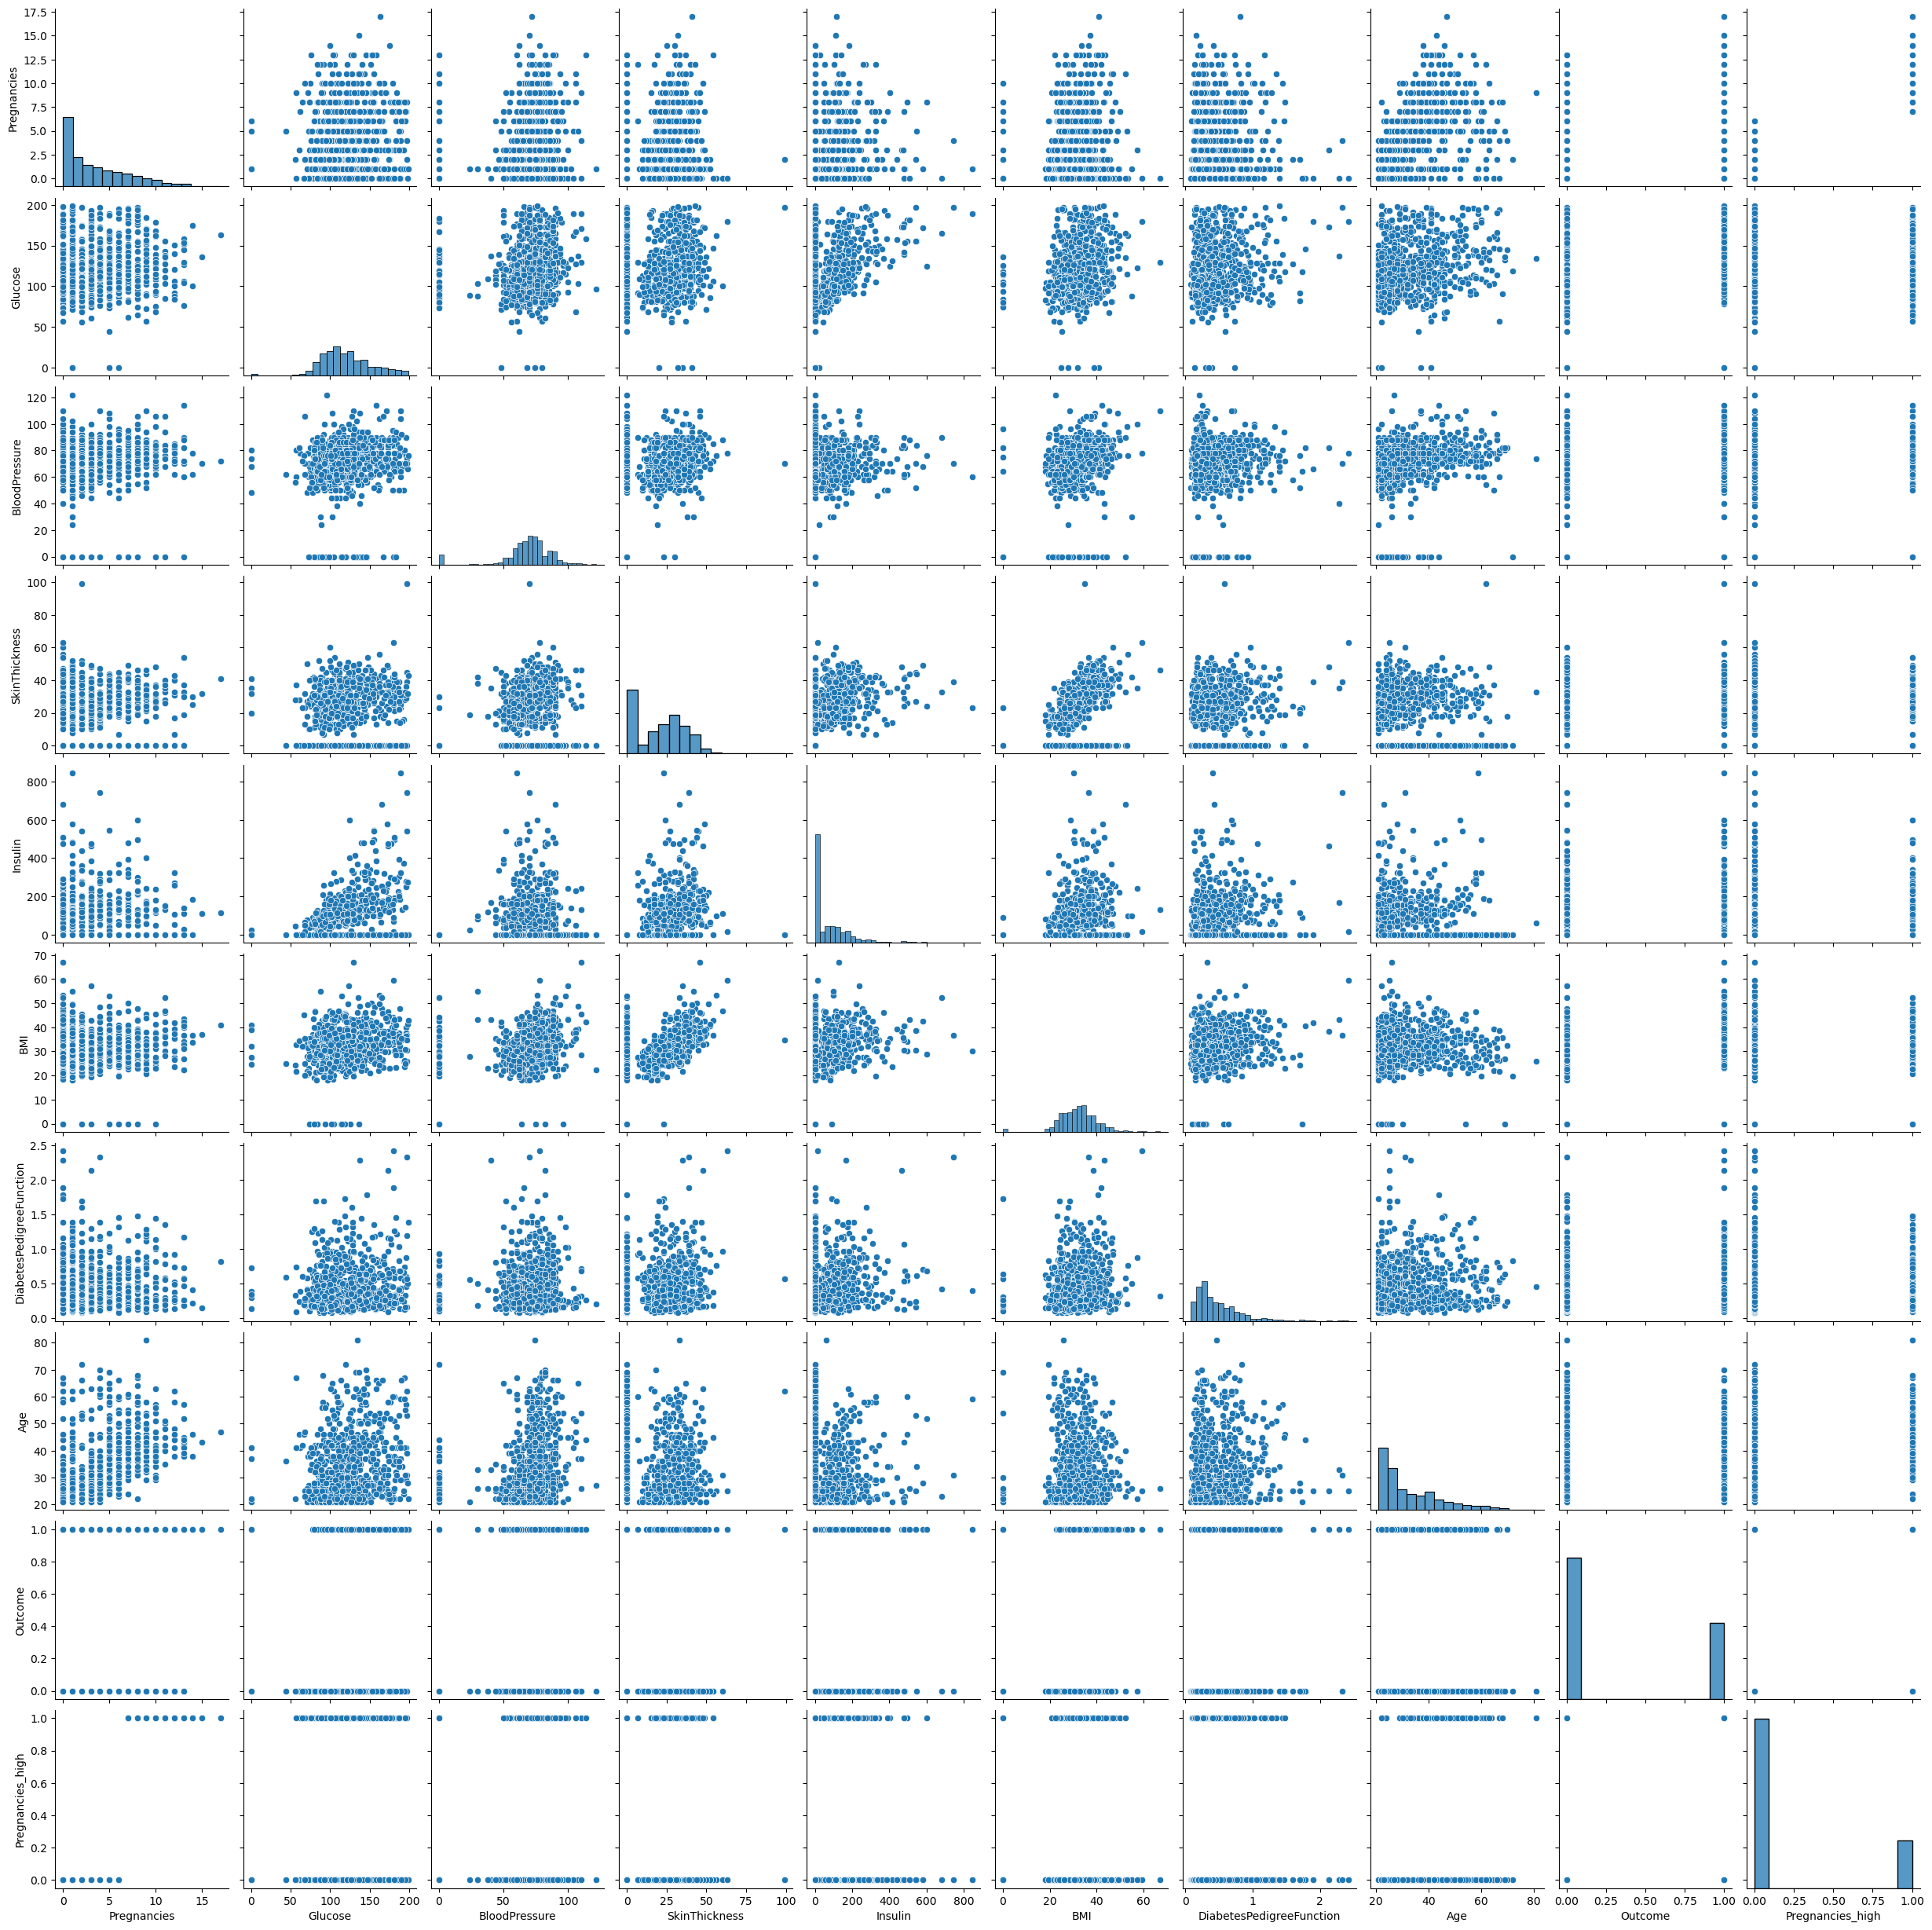

In [99]:
# pairplot
sns.pairplot(df)

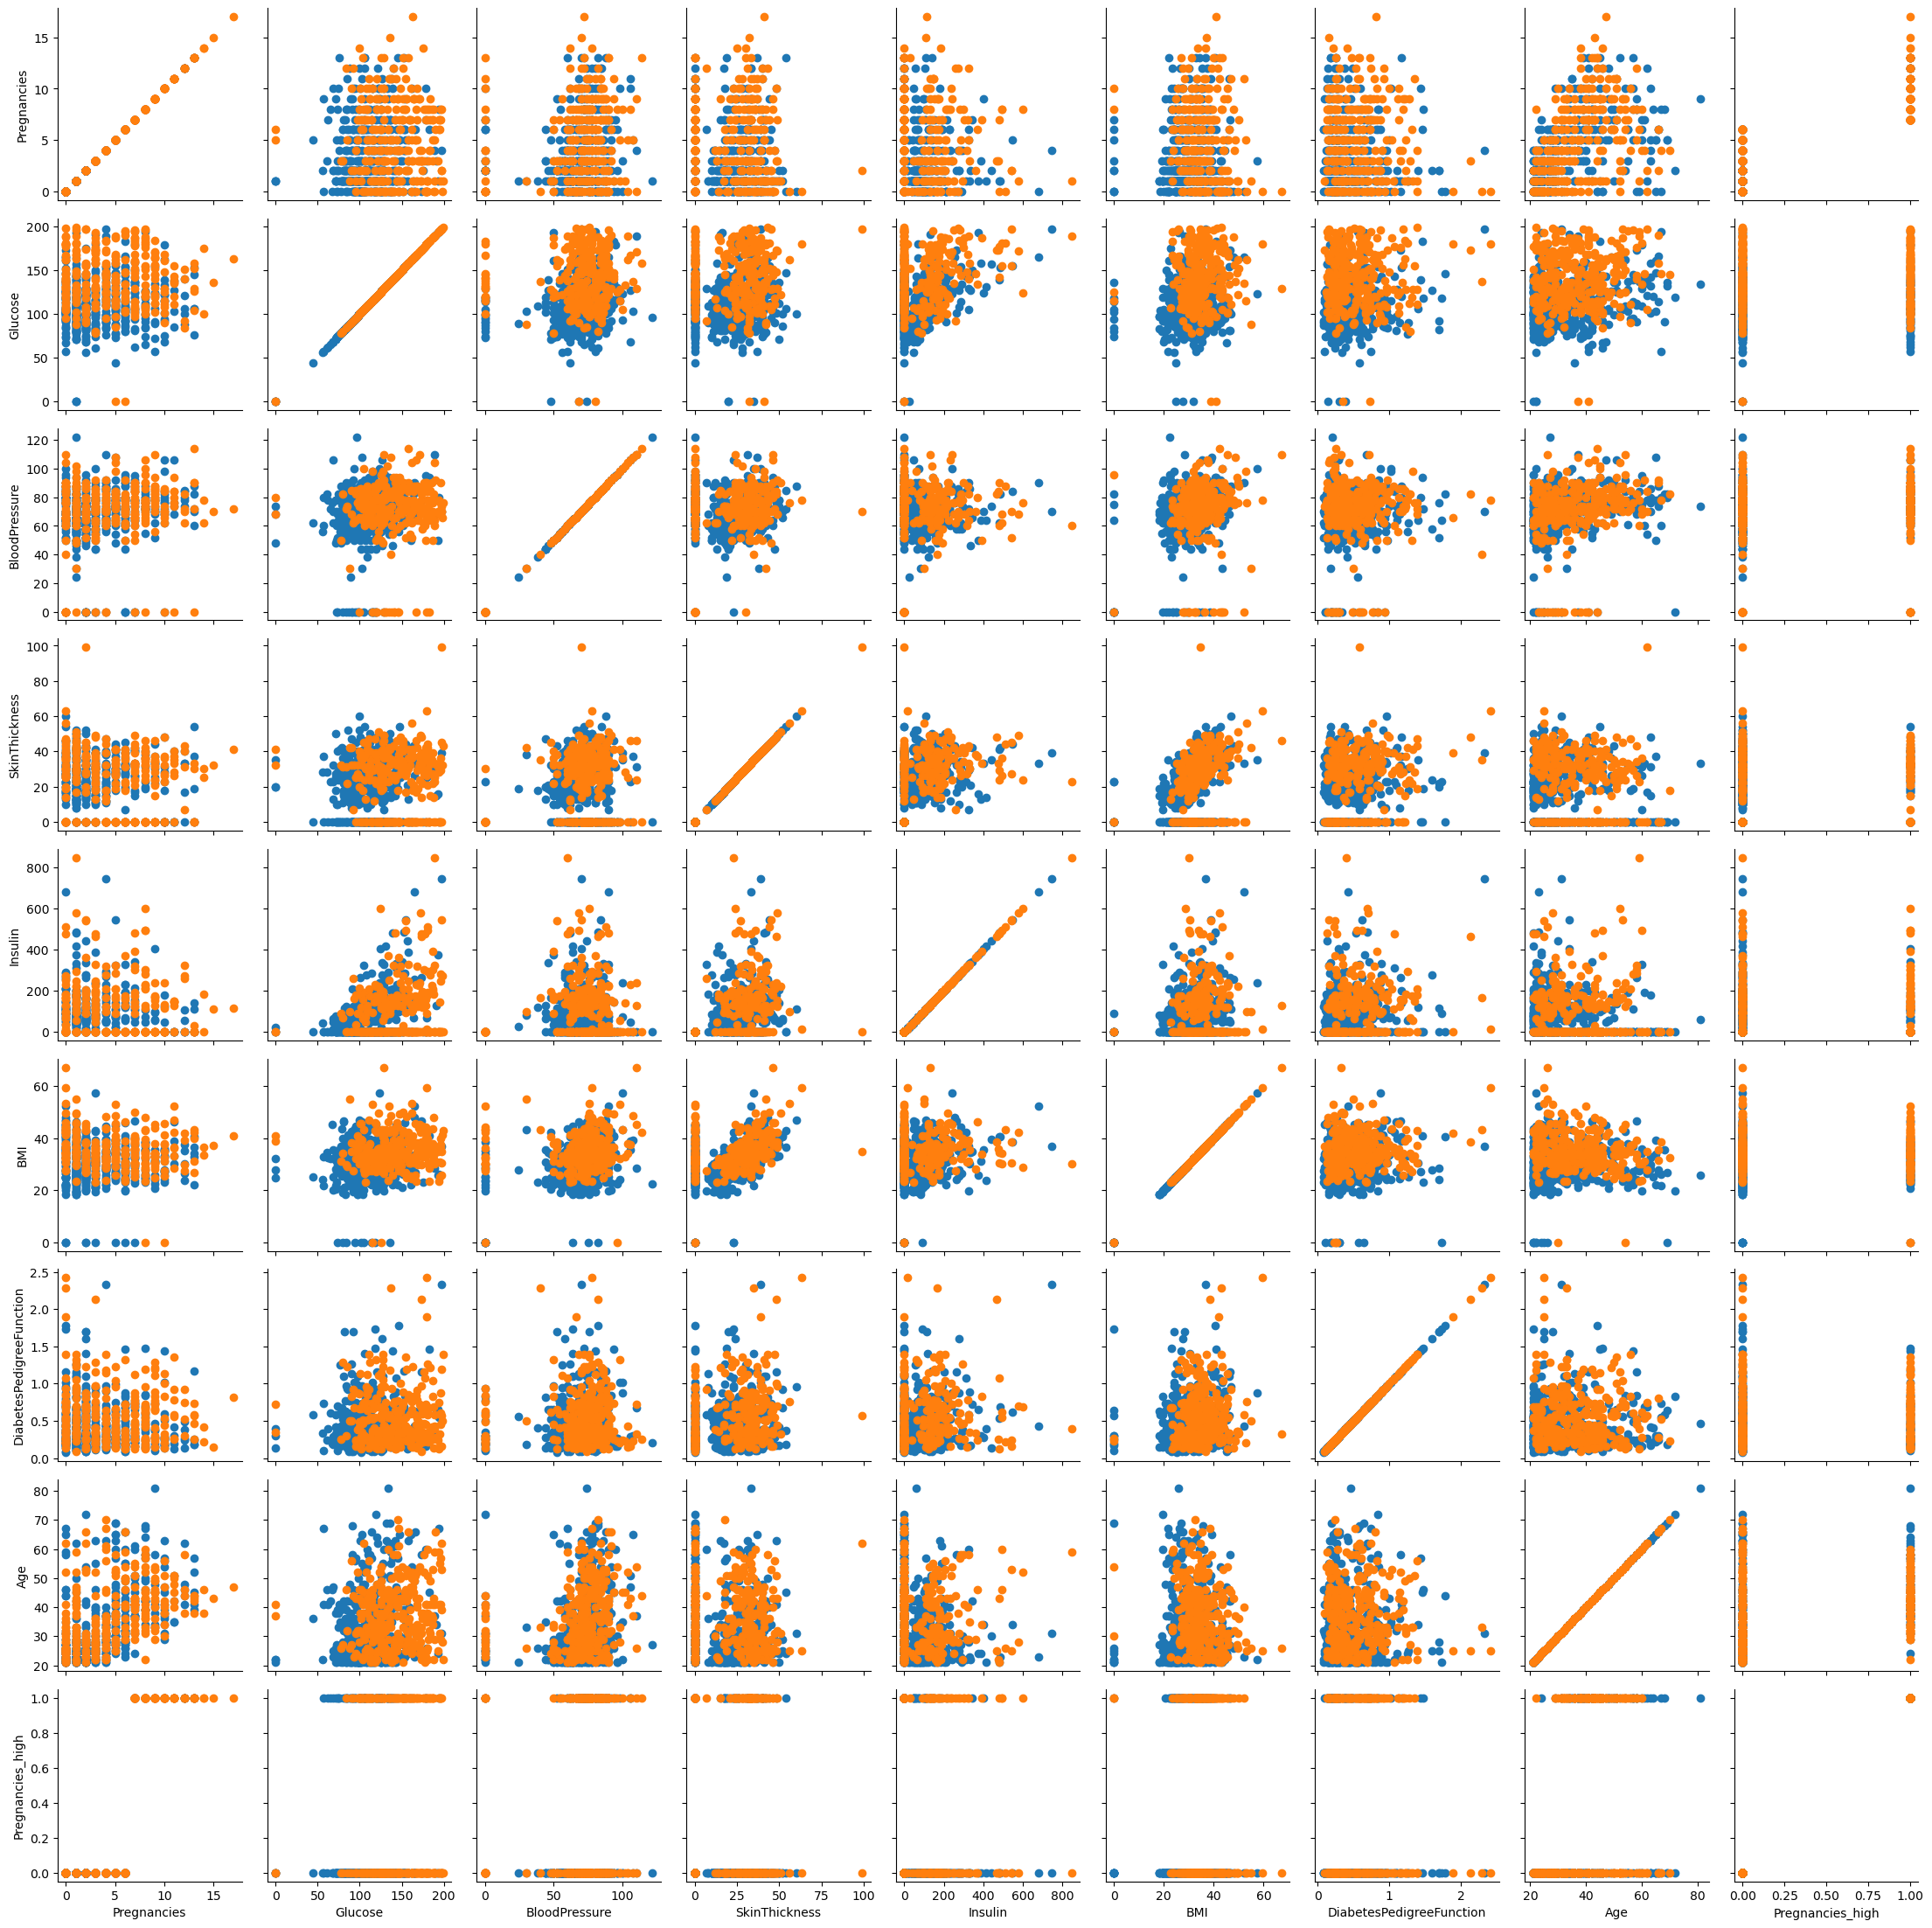

In [100]:
# pairgrid
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

#### 6. Analysing correlation coefficient for feature engineering.

In [102]:
# Correlation
df_corr = df.corr()
df_corr.style.background_gradient()

<Axes: >

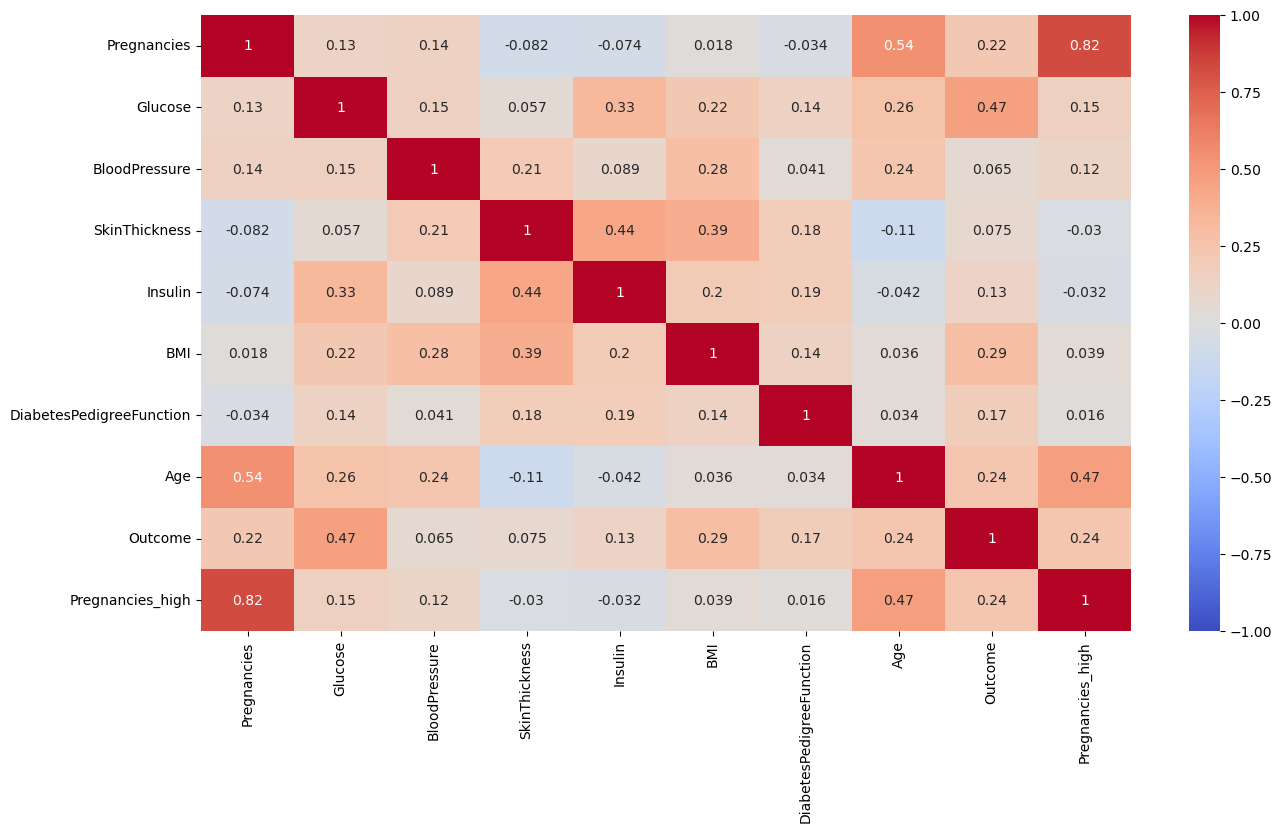

In [108]:
# Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [109]:
# Excluding Outcome and Pregancies_high. 
# Replacing zero values with NaN.
df.iloc[:, :-2].replace(0, np.nan)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      NaN  33.6   
1            1.0     85.0           66.0           29.0      NaN  26.6   
2            8.0    183.0           64.0            NaN      NaN  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      NaN  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            NaN      NaN  30.1   
767          1.0     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [110]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<Axes: >

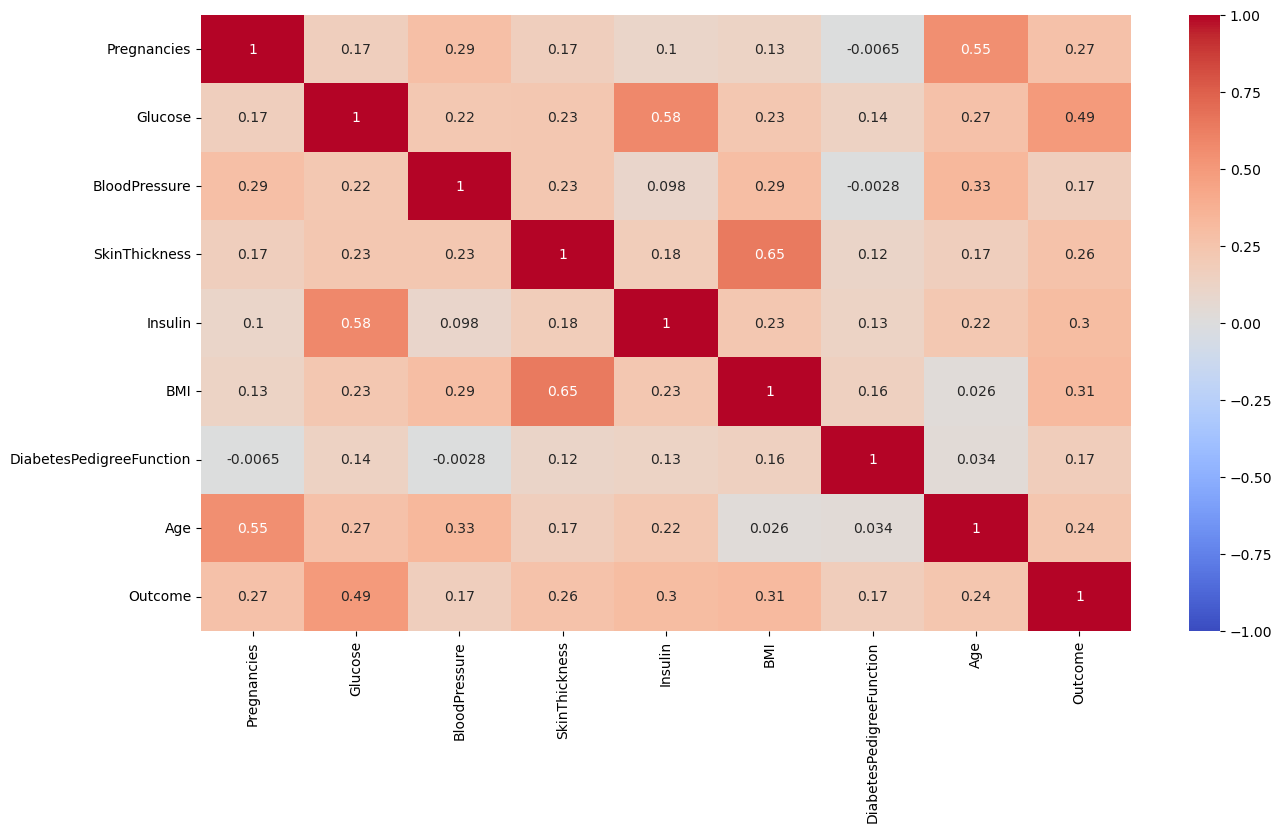

In [112]:
# After considering zero values missing values, we can detect a high corelation betwen insulin and glucose.
plt.figure(figsize=(15, 8))
df_matrix_corr = df_matrix.corr()
sns.heatmap(df_matrix_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [111]:
# Let's calculate the correlation coefficient between outcome and other variables.
df_corr["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Pregnancies_high            0.237557
Name: Outcome, dtype: float64

<Axes: xlabel='Insulin', ylabel='Glucose'>

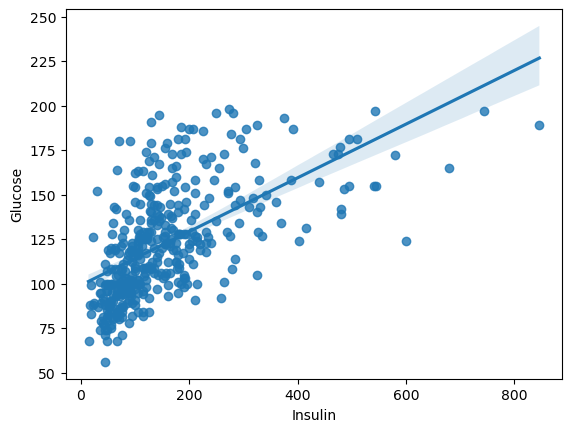

In [114]:
# replot between insulin and glucose
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

<Axes: xlabel='Age', ylabel='Pregnancies'>

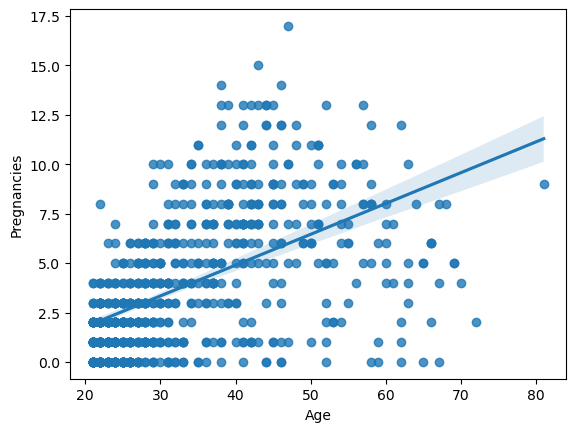

In [115]:
# replot between age and pregnancies
sns.regplot(data=df, x="Age", y="Pregnancies")

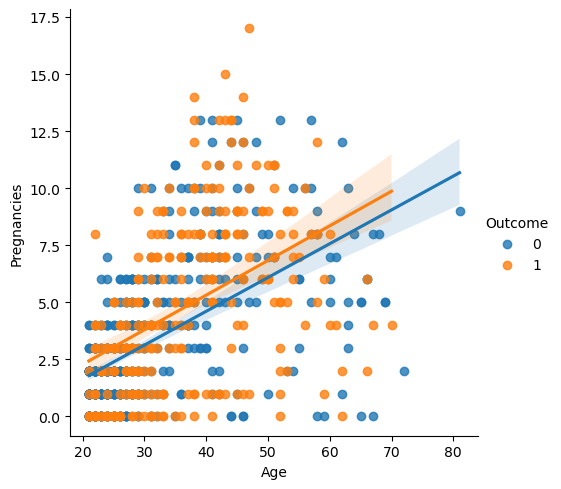

In [116]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome")

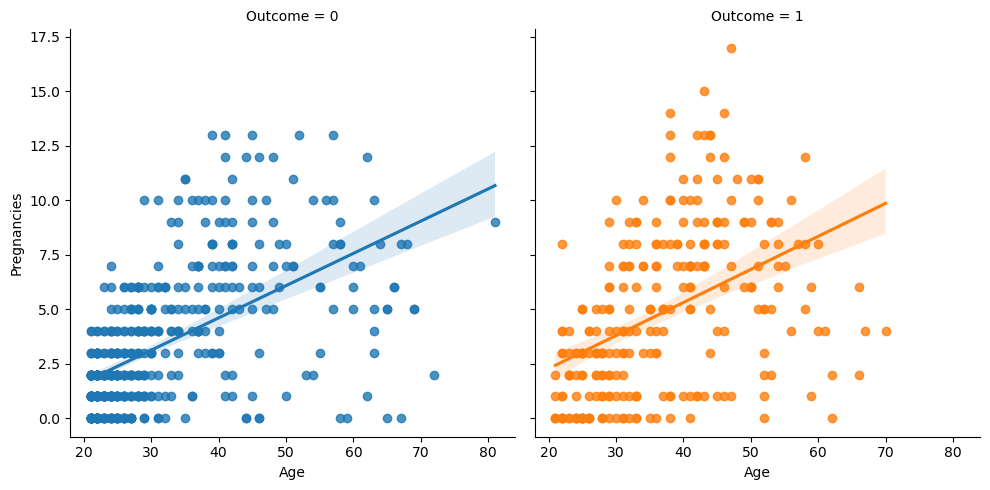

In [117]:
sns.lmplot(data=df, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")